In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('C:/Users/Robert/Desktop/database.sqlite')

def newQuery(query):
    df = pd.read_sql_query(query, conn)
    return df

In [2]:
topTenNamesAllTime = '''
                        select Name, sum(Count)
                        from NationalNames
                        group by Name
                        order by Count desc
                        limit 10;'''

newQuery(topTenNamesAllTime)

,Name,sum(Count)
0,Noah,319298
1,Liam,137414
2,Mason,227887
3,Jacob,877522
4,William,4071368
5,Ethan,372301
6,Michael,4330805
7,Alexander,624747
8,James,5129096
9,Daniel,1876880


In [3]:
topYearsForRobert = '''
                        select Year, Count, Name
                        from NationalNames
                        where Name = 'Robert'
                        order by Count desc
                        limit 10'''

newQuery(topYearsForRobert)

,Year,Count,Name
0,1947,91642,Robert
1,1952,86572,Robert
2,1951,86327,Robert
3,1954,86258,Robert
4,1953,86135,Robert
5,1948,85479,Robert
6,1946,84130,Robert
7,1956,83903,Robert
8,1949,83841,Robert
9,1955,83676,Robert


In [4]:
topNames1947 = '''
                    select Name, Count
                    from NationalNames
                    where Year = 1947
                    order by Count desc
                    limit 10;'''

top1947 = newQuery(topNames1947)

# **In 1947, the numbers of 'Robert' were its highest.**

# **Yet only was the third most picked name during that year.**

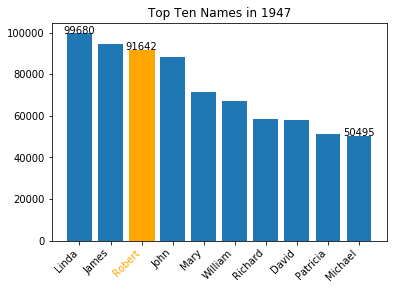

In [5]:
names1947 = plt.bar(top1947['Name'], top1947['Count'])
plt.text(top1947['Name'][0], top1947['Count'][0], str(top1947['Count'][0]), horizontalalignment='center')
plt.text(top1947['Name'][2], top1947['Count'][2], str(top1947['Count'][2]), horizontalalignment='center')
plt.text(top1947['Name'][9], top1947['Count'][9], str(top1947['Count'][9]), horizontalalignment='center')
plt.xticks(rotation=45, ha='right')
plt.title('Top Ten Names in 1947')
names1947[2].set_color('orange')

plt.gca().get_xticklabels()[2].set_color('Orange')


# **In the query below, we can see 'Robert' was the most picked name**
# **in seven different years.**

In [6]:
mostTimesNumberOne = '''
                        with topNames as 
                        (select Year, Name, max(Count)
                            from NationalNames
                            group by Year)

                        select Name, count(Name)
                        from topNames 
                        group by Name
                        order by count(Name) desc;'''

newQuery(mostTimesNumberOne)

,Name,count(Name)
0,Mary,49
1,Michael,44
2,Jacob,10
3,James,10
4,Robert,7
5,John,5
6,Linda,3
7,Sophia,3
8,Isabella,2
9,David,1


In [7]:
yearsRobertIsOne = '''
with topName as
(select Year, Name, max(Count) as Max
    from NationalNames
    group by Year)
    
select Name, Year, Max
from topName 
where Name = 'Robert'
order by Max desc;
'''

In [8]:
newQuery(yearsRobertIsOne)

,Name,Year,Max
0,Robert,1953,86135
1,Robert,1938,62262
2,Robert,1937,61821
3,Robert,1931,60497
4,Robert,1939,59640
5,Robert,1936,58486
6,Robert,1935,56514


In [9]:
years_of_interest = ['1953','1938','1937','1931','1939','1936','1935']

## Here we see the 7 years that Robert was the most picked name.
## 1953 was the highest count of 'Robert' when it was picked the most.
## Yet this year was the 5th highest picked year for 'Robert' and the
## only one of the top ten years for 'Robert'

In [10]:
year1953 = '''
select Year, Name, Count
from NationalNames
where Year = 1953
order by Count desc
limit 10;'''

In [11]:
theYear1953 = newQuery(year1953)

In [12]:
theYear1953

,Year,Name,Count
0,1953,Robert,86135
1,1953,James,85946
2,1953,Michael,84164
3,1953,John,80072
4,1953,David,76037
5,1953,Mary,64337
6,1953,William,61775
7,1953,Linda,61244
8,1953,Richard,58285
9,1953,Deborah,52183


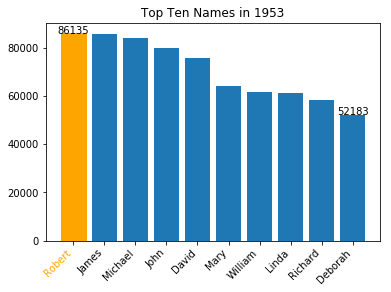

In [13]:
names1953 = plt.bar(theYear1953['Name'], theYear1953['Count'])
plt.text(theYear1953['Name'][0], theYear1953['Count'][0], str(theYear1953['Count'][0]), horizontalalignment='center')
plt.text(theYear1953['Name'][9], theYear1953['Count'][9], str(theYear1953['Count'][9]), horizontalalignment='center')
plt.xticks(rotation=45, ha='right')
plt.title('Top Ten Names in 1953')
names1953[0].set_color('orange')

plt.gca().get_xticklabels()[0].set_color('Orange')

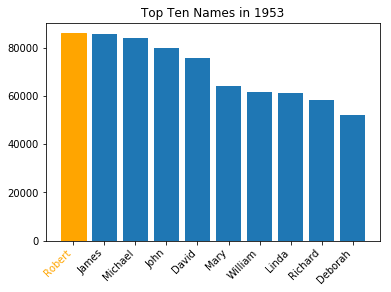

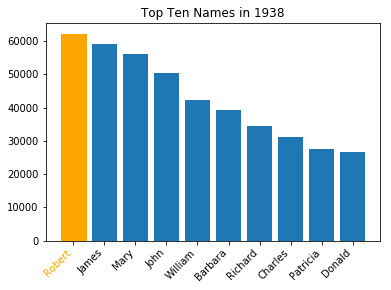

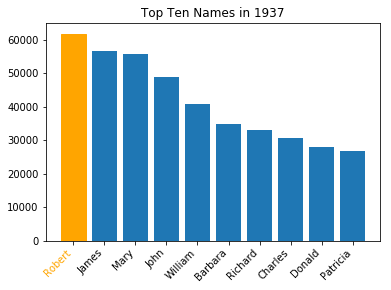

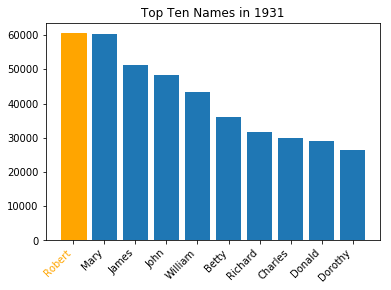

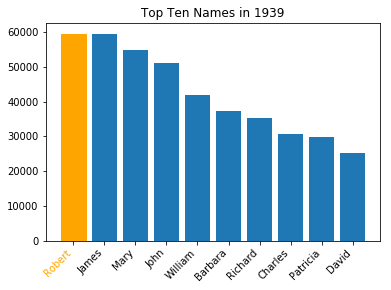

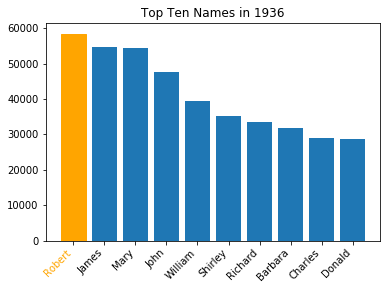

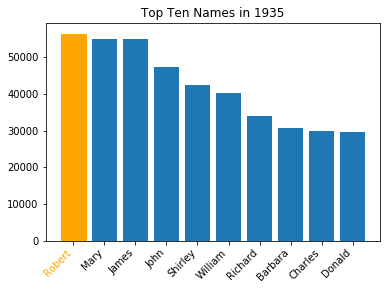

In [14]:
for year in years_of_interest:
        current_year = '''
                    select Year, Name, Count
                    from NationalNames
                    where Year = {}
                    order by Count desc
                    limit 10;'''.format(year)

        current_query = newQuery(current_year)
        names1953 = plt.bar(current_query['Name'], current_query['Count'])
        plt.xticks(rotation=45, ha='right')
        plt.title('Top Ten Names in {}'.format(year))
        names1953[0].set_color('orange')

        plt.gca().get_xticklabels()[0].set_color('Orange')
        plt.show()
        